In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('process_heart.csv')

In [2]:
df.shape

(303, 27)

In [3]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [4]:
x=df.drop('target',axis=1)
# 要预测的列：标签列
# 已知列：标签列

In [5]:
x.shape
# 矩阵大写，向量小写

(303, 26)

In [6]:
y=df['target']

In [7]:
y.shape

(303,)

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)
# test_size：指定测试集占比大小

In [10]:
x_train.shape
# （元素数，特征数）

(242, 26)

In [11]:
x_test.shape

(61, 26)

In [12]:
y_train.shape

(242,)

In [13]:
y_test.shape

(61,)

In [14]:
x_test.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
246,56,134,409,150,1.9,2,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
183,58,112,230,165,2.5,1,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
229,64,125,309,131,1.8,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
126,47,112,204,143,0.1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
184,50,150,243,128,2.6,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


In [15]:
from sklearn.ensemble import RandomForestClassifier
# 随机森林分类器

In [16]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [17]:
model = RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)
model.fit(x_train, y_train)
# model：实例化
# n_estimator：决策树数量

RandomForestClassifier(max_depth=5, random_state=5)

In [18]:
len(model.estimators_)

100

In [19]:
estimator=model.estimators_[7]

In [20]:
estimator

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=2059200585)

In [21]:
feature_names=x_train.columns
y_train_str=y_train.astype('str')
y_train_str[y_train_str=='0']='no disease'
y_train_str[y_train_str=='1']='disease'
y_train_str=y_train_str.values

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot',
               feature_names = feature_names,
               class_names=y_train_str,
               rounded=True, proportion=True,
               label='root',
               precision=2, filled=True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename='tree.png')
# 可视化决策树

In [23]:
import eli5
eli5.show_weights(estimator,feature_names=feature_names.to_list())

Weight,Feature
0.3690,exercise_induced_angina_yes
0.2080,age
0.0867,st_depression
0.0616,thalassemia_fixed defect
0.0548,cholesterol
0.0522,sex_male
0.0329,chest_pain_type_typical angina
0.0310,resting_blood_pressure
0.0310,thalassemia_reversable defect
0.0283,max_heart_rate_achieved


In [24]:
model.feature_importances_

array([0.05614043, 0.04827184, 0.04407129, 0.08853471, 0.08467226,
       0.14020655, 0.02749492, 0.02202319, 0.0098385 , 0.00767497,
       0.02349542, 0.1477068 , 0.00561248, 0.00691582, 0.00972928,
       0.00072171, 0.01042145, 0.03575505, 0.04107245, 0.03384032,
       0.02449912, 0.00315107, 0.06898662, 0.00388003, 0.05441833,
       0.00086539])

In [25]:
print('特征排序：')
feature_names = x_test.columns
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

for index in indices:
    print("feature %s (%f)" %(feature_names[index], feature_importances[index]))

特征排序：
feature chest_pain_type_typical angina (0.147707)
feature num_major_vessels (0.140207)
feature max_heart_rate_achieved (0.088535)
feature st_depression (0.084672)
feature thalassemia_fixed defect (0.068987)
feature age (0.056140)
feature thalassemia_reversable defect (0.054418)
feature resting_blood_pressure (0.048272)
feature cholesterol (0.044071)
feature exercise_induced_angina_yes (0.041072)
feature exercise_induced_angina_no (0.035755)
feature st_slope_downsloping (0.033840)
feature sex_female (0.027495)
feature st_slope_flat (0.024499)
feature chest_pain_type_non-anginal pain (0.023495)
feature sex_male (0.022023)
feature rest_ecg_normal (0.010421)
feature chest_pain_type_asymptomatic (0.009839)
feature rest_ecg_ST-T wave abnormality (0.009729)
feature chest_pain_type_atypical angina (0.007675)
feature fasting_blood_sugar_lower than 120mg/ml (0.006916)
feature fasting_blood_sugar_greater than 120mg/ml (0.005612)
feature thalassemia_normal (0.003880)
feature st_slope_upslopi

In [26]:
import eli5
eli5.show_weights(model,feature_names=feature_names.to_list())

Weight,Feature
0.1477 ± 0.3141,chest_pain_type_typical angina
0.1402 ± 0.2353,num_major_vessels
0.0885 ± 0.1962,max_heart_rate_achieved
0.0847 ± 0.1604,st_depression
0.0690 ± 0.2245,thalassemia_fixed defect
0.0561 ± 0.1060,age
0.0544 ± 0.1846,thalassemia_reversable defect
0.0483 ± 0.0768,resting_blood_pressure
0.0441 ± 0.0855,cholesterol
0.0411 ± 0.1505,exercise_induced_angina_yes


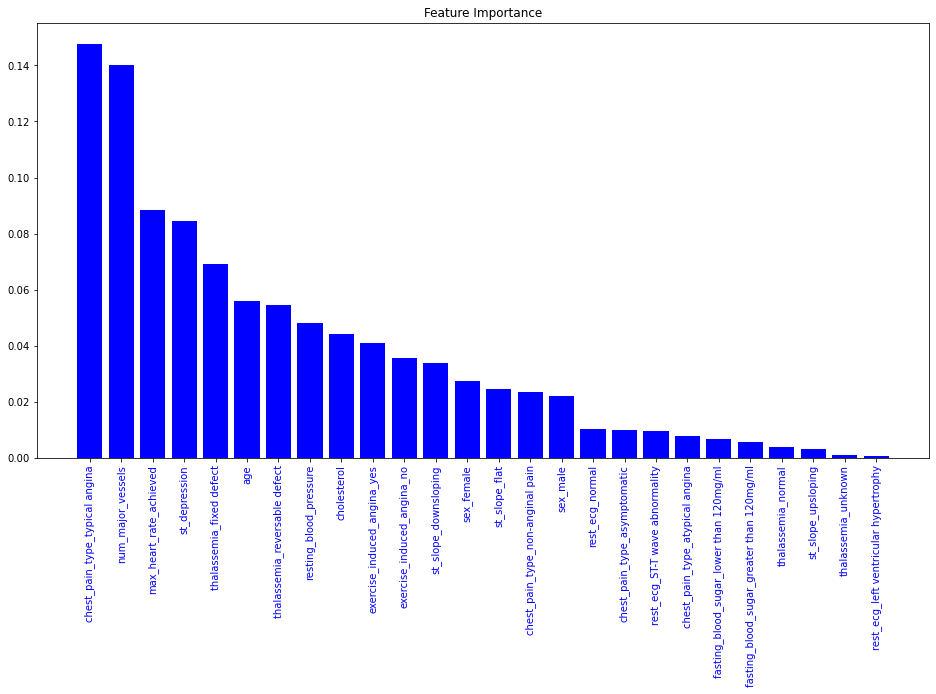

In [27]:
plt.figure(figsize=(16,8))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b', rotation=90)
plt.show()